### Econometric Modeling (Multiple Linear Regression)


### Importing Modules

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

#### Import the data

In [113]:
df=pd.read_csv('dvf_Paris.csv',parse_dates=['date_mutation'])
df.head()

id_mutation date_mutation numero_disposition nature_mutation  \
0  2024-1182180    2024-01-04                  1           Vente   
1  2024-1182180    2024-01-04                  1           Vente   
2  2024-1182180    2024-01-04                  1           Vente   
3  2024-1182180    2024-01-04                  1           Vente   
4  2024-1182180    2024-01-04                  1           Vente   

  valeur_fonciere adresse_numero adresse_suffixe adresse_nom_voie  \
0       1042000.0            4.0             NaN      VLA PERREUR   
1       1042000.0            4.0             NaN      VLA PERREUR   
2       1042000.0            4.0             NaN      VLA PERREUR   
3       1042000.0           16.0             NaN  RUE DE LA DHUIS   
4       1042000.0           16.0             NaN  RUE DE LA DHUIS   

  adresse_code_voie code_postal  ... surface_reelle_bati  \
0              7288     75020.0  ...                 NaN   
1              7288     75020.0  ...                 NaN   
2              7288     75020.0  ...                86.0   
3              2786     75020.0  ...                 NaN   
4              2786     75020.0  ...                 NaN   

  nombre_pieces_principales code_nature_culture nature_culture  \
0                       0.0                 NaN            NaN   
1                       0.0                 NaN            NaN   
2                       4.0                 NaN            NaN   
3                       0.0                 NaN            NaN   
4                       0.0                 NaN            NaN   

  code_nature_culture_speciale nature_culture_speciale surface_terrain  \
0                          NaN                     NaN             NaN   
1                          NaN                     NaN             NaN   
2                          NaN                     NaN             NaN   
3                          NaN                     NaN             NaN   
4                          NaN                     NaN             NaN   

  longitude   latitude section_prefixe  
0  2.405228  48.868216           000BM  
1  2.405228  48.868216           000BM  
2  2.405228  48.868216           000BM  
3  2.405228  48.868216           000BM  
4  2.405228  48.868216           000BM  

[5 rows x 41 columns]

In [114]:
df.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'section_prefixe'],
      dtype='object')

#### Verification of missing values

In [115]:
df.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                   4685
adresse_numero                    1749
adresse_suffixe                 371885
adresse_nom_voie                  1700
adresse_code_voie                 1700
code_postal                       1709
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             389586
ancien_nom_commune              389586
id_parcelle                          0
ancien_id_parcelle              389586
numero_volume                   388105
lot1_numero                      37121
lot1_surface_carrez             234589
lot2_numero                     226178
lot2_surface_carrez             343762
lot3_numero                     362299
lot3_surface_carrez             384897
lot4_numero                     379615
lot4_surface_carrez      

The file contains many missing values, but given the large size of our dataset, we will simply remove them all. Some variables are not relevant to our study, so we will replace their values with 0. There are also some columns that are completely empty and irrelevant to our analysis or model, so we will remove them as well.

In [116]:
# Columns Completely empty : 
df=df.drop(columns=['adresse_suffixe','ancien_code_commune','ancien_nom_commune','ancien_id_parcelle',
                 'numero_volume'])
# Handling Missing values :
df=df.dropna(subset=['longitude','latitude'])
# Replacing missing values with 0 :
colonnes=['lot1_surface_carrez','lot2_surface_carrez','lot3_surface_carrez','lot4_surface_carrez',
          'lot5_surface_carrez','surface_terrain','valeur_fonciere']
df[colonnes]=df[colonnes].fillna(0)
 

#### Verifying and converting data types 


In [117]:
df.dtypes

id_mutation                     object
date_mutation                   object
numero_disposition              object
nature_mutation                 object
valeur_fonciere                 object
adresse_numero                  object
adresse_nom_voie                object
adresse_code_voie               object
code_postal                     object
code_commune                    object
nom_commune                     object
code_departement                object
id_parcelle                     object
lot1_numero                     object
lot1_surface_carrez             object
lot2_numero                     object
lot2_surface_carrez             object
lot3_numero                     object
lot3_surface_carrez             object
lot4_numero                     object
lot4_surface_carrez             object
lot5_numero                     object
lot5_surface_carrez             object
nombre_lots                     object
code_type_local                 object
type_local               

#### Converting the clomuns into appropriate data types

In [118]:
#date_mutation
df['date_mutation'] = pd.to_datetime(df['date_mutation'],errors='coerce')
#valeur_fonciere
df['valeur_fonciere'] = pd.to_numeric(df['valeur_fonciere'], errors='coerce')
#les surfaces des lots
df['lot1_surface_carrez'] = pd.to_numeric(df['lot1_surface_carrez'], errors='coerce')
df['lot2_surface_carrez'] = pd.to_numeric(df['lot2_surface_carrez'], errors='coerce')

df['lot3_surface_carrez'] = pd.to_numeric(df['lot3_surface_carrez'], errors='coerce')
df['lot4_surface_carrez'] = pd.to_numeric(df['lot4_surface_carrez'], errors='coerce')
df['lot5_surface_carrez'] = pd.to_numeric(df['lot5_surface_carrez'], errors='coerce')
#longitude et latitude

df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
#surface terrain et batiment

df['surface_terrain'] = pd.to_numeric(df['surface_terrain'], errors='coerce')
df['surface_reelle_bati'] = pd.to_numeric(df['surface_reelle_bati'], errors='coerce')
#nombre_pieces_principales

df['nombre_pieces_principales'] = pd.to_numeric(df['nombre_pieces_principales'], errors='coerce')

Visualization of Variable Distributions (Before and After Removing Outliers)

In this session, we will visualize the distribution (density) of the numerical variables that will be included in our model. Then, we will correct these variables by removing outliers using the Interquartile Range (IQR) method. Finally, we will visualize the variables again after removing the extreme values.

In [119]:
def Density(df,column):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[column], fill=True)
    plt.title(f"Densité de la variable{column}]")
    plt.xlabel(column)
    plt.ylabel("Densité")
    plt.show() 


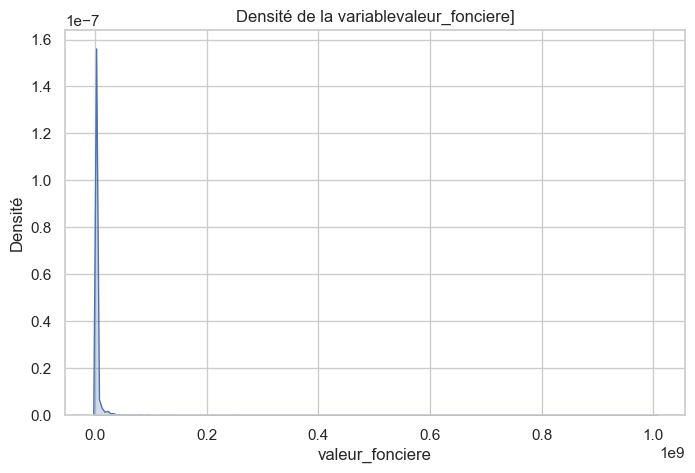

In [120]:
Density(df,"valeur_fonciere")

#### Removing Outliers with the Interquartile Method

In [121]:
def interquartile(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    seuil_min=Q1-1.5*IQR
    seuil_max=Q3+1.5*IQR
    condition=(df[column]>seuil_min) & (df[column] < seuil_max)
    return df[condition]

In [122]:
df=interquartile(df,'valeur_fonciere')

#### Represent the distribution of "valeur_fonciere" after removing Outliers

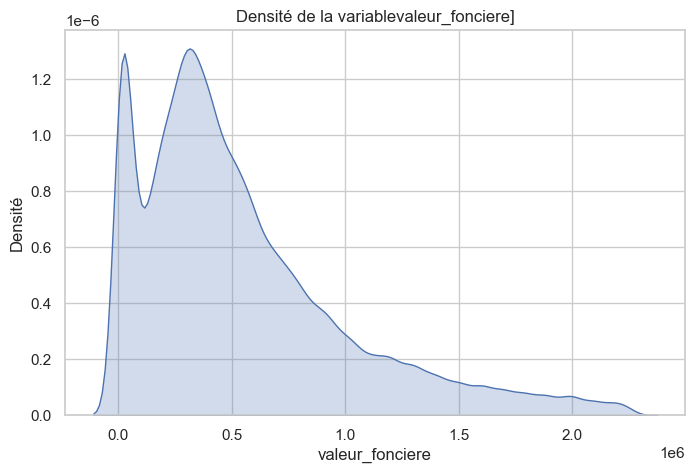

In [123]:
Density(df,"valeur_fonciere")

#### The distribution of surface_reelle_bati :

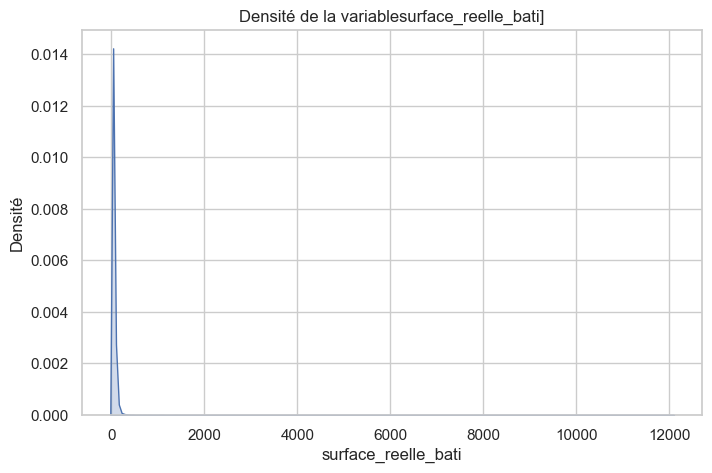

In [124]:
Density(df,'surface_reelle_bati')

In [125]:
df=interquartile(df,'surface_reelle_bati')

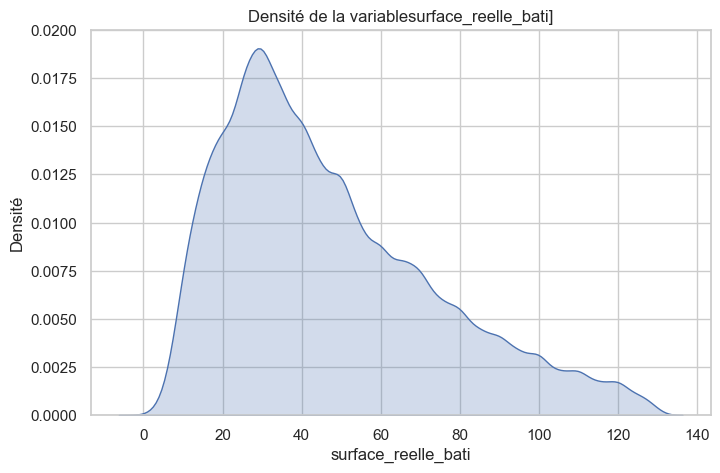

In [126]:
Density(df,'surface_reelle_bati')

#### Distribution of surface terrain

#### Distribution of "Nombre de pieces principales" 

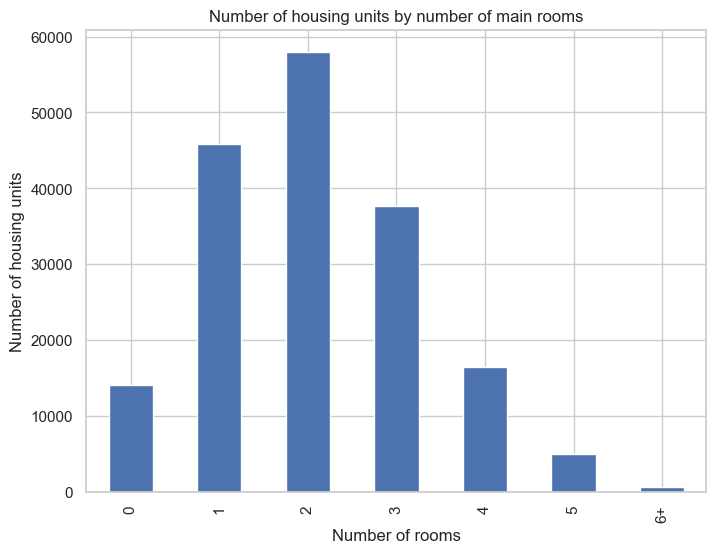

In [127]:
df['nombre_de_pieces_groupe']=df['nombre_pieces_principales'].apply(lambda x: str(int(x)) if x<6 else '6+')
count=df['nombre_de_pieces_groupe'].value_counts().sort_index(key=lambda x: x.map(lambda v: int(v.replace('+',''))))
plt.figure(figsize=(8,6))
count.plot(kind='bar')
plt.title("Number of housing units by number of main rooms")
plt.xlabel("Number of rooms")
plt.ylabel("Number of housing units")
plt.show()

#### Geographic Heatmap of Property Sales in Paris

In [128]:
coordinates=list(zip(df['latitude'],df['longitude']))
from folium.plugins import HeatMap
import folium
map=folium.Map(location=[48.8566,2.3522],zoom_start=12)
HeatMap(coordinates).add_to(map)
map


### Representation of the average price of houses for each "arrondissement"

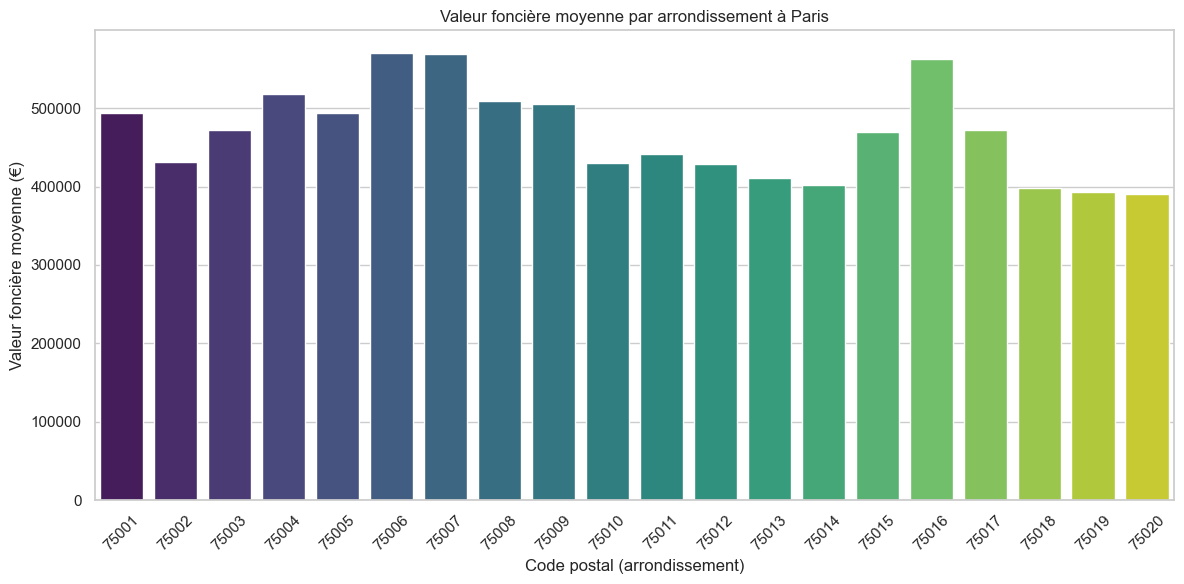

In [152]:
df['code_postal'] = df['code_postal'].astype(str).str.split('.').str[0]
# Calculate the mean for each arrondissement
moyennes = df.groupby('code_postal')['valeur_fonciere'].mean()
moyennes = moyennes.sort_index(key=lambda x: x.astype(int))
# the barplot: 
plt.figure(figsize=(12, 6))
sns.barplot(x=moyennes.index, y=moyennes.values, palette='viridis')
plt.title("Valeur foncière moyenne par arrondissement à Paris")
plt.xlabel("Code postal (arrondissement)")
plt.ylabel("Valeur foncière moyenne (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Create the year column

In [131]:
df['year'] = pd.to_datetime(df['date_mutation']).dt.year


After cleaning the dataset—specifically by handling outliers and removing missing values—we proceed to modeling. As a first step, we will attempt to explain property prices using a multiple linear regression model, taking into account geographic location (longitude and latitude), the actual built surface area, and the number of main rooms as explanatory variables. Then, we will aim to improve our estimation using a machine learning algorithm: **ExtraTreesRegressor**.
We aim to estimate the following relationship:

$$
\text{Valeur\_fonciere} = \beta_0 + \beta_1 \cdot \text{surface\_reelle\_bati} + \beta_2 \cdot \text{nombre\_piece\_principales} + \beta_3 \cdot \text{longitude} + \beta_4 \cdot \text{latitude} + \varepsilon_i
$$

### Multiple linear regression Model

In [135]:
#select only transactions related to houses (maisons) and appartements:
df_maisons=df[df['type_local'].isin(['Maison','Appartement'])]
df_reg=df_maisons.dropna(subset=['longitude', 'latitude','surface_reelle_bati',
                                  'nombre_pieces_principales','valeur_fonciere','year'])
X=df_reg[['longitude', 'latitude','surface_reelle_bati', 'nombre_pieces_principales','year']]
Y=df_reg['valeur_fonciere']



Model=sm.OLS(Y,X).fit()

Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        valeur_fonciere   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          1.730e+05
Date:                Tue, 17 Jun 2025   Prob (F-statistic):                        0.00
Time:                        21:02:58   Log-Likelihood:                     -2.1045e+06
No. Observations:              153875   AIC:                                  4.209e+06
Df Residuals:                  153870   BIC:                                  4.209e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
longitude                 -4.849e+05    1.4e+04    -34.590      0.000   -5.12e+05   -4.57e+05
latitude                   3.907e+05   1.54e+04     25.349      0.000    3.61e+05    4.21e+05
surface_reelle_bati        8339.0906     42.657    195.492      0.000    8255.484    8422.697
nombre_pieces_principales  7354.5812    988.324      7.441      0.000    5417.486    9291.677
year                      -8845.1263    371.357    -23.818      0.000   -9572.979   -8117.273
==============================================================================
Omnibus:                    17931.436   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184398.569
Skew:                          -0.082   Prob(JB):                         0.00
Kurtosis:                       8.360   Cond. No.                     5.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


### **1) Overall Model Quality**

**The (uncentered) R² of the model is 0.849**: The model globally explains 84.9% of the variation in property values in Paris.

**The Fisher statistic** is 173,000, which shows that the model is globally significant. The explanatory variables used do, overall, help explain land prices, and the p-value being 0 confirms the significance of the test.

**The Durbin-Watson statistic** is 1.316. This value suggests a slight positive autocorrelation between the residuals of the model.

---

### **2) Interpretation of the Coefficients**

**Model constant**: *not included in this model since it is uncentered.* Therefore, there is no constant to interpret here.

**Longitude**: -484,900. It is not very reasonable to say that an increase of one unit in longitude would lead to a €484,900 drop in price, since longitude in Paris only ranges from about 2.2 to 2.5. However, this coefficient indicates that as you move eastward in Paris, prices tend to decrease.

**Latitude**: 390,700. We estimate that prices increase as we move northward in Paris.

**Actual built surface area**: the coefficient is 8,339. We can estimate that an additional square meter increases the property price by €8,339, all else being equal, which is close to the average price per square meter in Paris.

**Number of main rooms**: 7,355. We estimate that a property with one additional room would see its price increase by around €7,355, all else being equal.

**Year of sale**: -8,845. This coefficient suggests that for more recent years (higher "year" values), the property value tends to decrease slightly. This trend might reflect structural effects in the data or market adjustments.


### Improving Price Estimation with Machine Learning Algorithms: ExtraTreesRegressor


After concluding on the influence of each variable on prices, and assuming that the relationships between variables are linear, we now use a machine learning model capable of detecting relationships that linear regression might not capture.

Extra Trees is a supervised ensemble machine learning method that uses decision trees. This method is similar to random forests but can be faster.

The ExtraTreesRegressor algorithm builds many decision trees, but each tree is trained on a randomly sampled dataset, creating a unique subset of samples for each tree. A specific number of features is also randomly selected from the full set of features for each tree. The most distinctive and unique characteristic of extra trees is the random selection of a split value for a given feature. Instead of computing a locally optimal split using Gini impurity or entropy, the algorithm randomly chooses a splitting threshold. As a result, the trees are more diverse and less correlated with one another.

#### Create a DataFrame with Only the Model Variables
First, we select only the variables needed for our model, then split the data into training and test sets so that the model can learn and detect relationships between variables that regression may not capture. The test set is used to evaluate the model by calculating the coefficient of determination (R²), the mean squared error (MSE), and the mean absolute error (MAE) of our predictions.

In [142]:
y = df_final['valeur_fonciere']
X = df_final.drop('valeur_fonciere', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = ExtraTreesRegressor(random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("ExtraTreesRegressor predictions:", predictions[:10])  # print first 10 predictions


ExtraTreesRegressor predictions: [1145631.          200000.          182961.79        310000.
  413000.           12000.          228600.          285016.9
  401488.          222813.92857143]


#### Evaluate the model

In [147]:

R2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² score: 0.8180
Mean Absolute Error (MAE): 48814.92


The R² score of 0.818 means that the model can explain about 82% of the variation in property prices — so it does a pretty good job predicting prices based on the features we used.

The Mean Absolute Error (MAE) of about 48,815 means that, on average, our model’s predicted prices are off by around €48,815 compared to the actual prices. While not perfect, this gives us a reasonable estimate of the property values.

### Evaluating the Importance of Explanatory Variables in Our Model


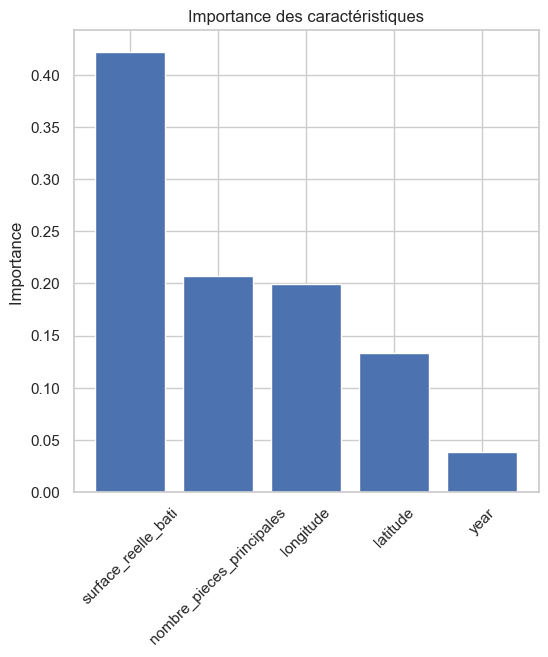

In [145]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(6, 6))
plt.title("Importance des caractéristiques")
plt.bar(X.columns ,importances[indices], align="center")
plt.xticks(X.columns,rotation=45)
plt.ylabel("Importance ")
plt.show()